# Problem Statement

**Sales Prediction for Big Mart Outlets** -The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

**Note** - In the train (8523) and test (5681) data set, the train data set has both input and output variable(s). You need to predict the sales for the test data set.

## **Aim** - To train a regression model on the training dataset and test it against the test dataset using different metrics.


# Loading the data from Kaggle

You may need to use the Kaggle API token to load data into Google Colab environment.

**Note** - This is only for Google Colab users.

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
!kaggle datasets download brijbhushannanda1979/bigmart-sales-data

  0% 0.00/307k [00:00<?, ?B/s]
100% 307k/307k [00:00<00:00, 91.6MB/s]


In [4]:
!unzip *.zip

Archive:  bigmart-sales-data.zip
  inflating: Test.csv                
  inflating: Train.csv               


# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import re
import random
from math import sqrt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

import sklearn.metrics

# Data Preparation

In [2]:
df_train = pd.read_csv("/content/Train.csv")
df_test = pd.read_csv("/content/Test.csv")

A look at the training dataset.

In [3]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


A look at the test dataset.

In [4]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Counts of training dataframe.

In [5]:
df_train.count()

Item_Identifier              8523
Item_Weight                  7060
Item_Fat_Content             8523
Item_Visibility              8523
Item_Type                    8523
Item_MRP                     8523
Outlet_Identifier            8523
Outlet_Establishment_Year    8523
Outlet_Size                  6113
Outlet_Location_Type         8523
Outlet_Type                  8523
Item_Outlet_Sales            8523
dtype: int64

Counts of test dataframe.

In [6]:
df_test.count()

Item_Identifier              5681
Item_Weight                  4705
Item_Fat_Content             5681
Item_Visibility              5681
Item_Type                    5681
Item_MRP                     5681
Outlet_Identifier            5681
Outlet_Establishment_Year    5681
Outlet_Size                  4075
Outlet_Location_Type         5681
Outlet_Type                  5681
dtype: int64

## Dataset properties

**Item_Identifier**	- Unique product ID

**Item_Weight**	- Weight of product
 
**Item_Fat_Content**	- Checks the Concentration of fat in the product

**Item_Visibility**	- The % of total display area of all similar products in a store

**Item_Type**	- Product Category

**Item_MRP**	- Maximum Retail Price for a Product

**Outlet_Identifier**	- Store ID

**Outlet_Establishment_Year**	- The year in which store was established

**Outlet_Size**	- The size of the store (Area Size Category)

**Outlet_Location_Type**	- In Terms of city Tiers (Size)

**Outlet_Type**	- Grocery store or a type of supermarket

**Item_Outlet_Sales**	- Sales of the product In the Specific outlet

In [7]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [8]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,4705.0,12.695633,4.664849,4.555,8.645000,12.500000,16.700000,21.350000
Item_Visibility,5681.0,0.065684,0.051252,0.000,0.027047,0.054154,0.093463,0.323637
Item_MRP,5681.0,141.023273,61.809091,31.990,94.412000,141.415400,186.026600,266.588400
Outlet_Establishment_Year,5681.0,1997.828903,8.372256,1985.000,1987.000000,1999.000000,2004.000000,2009.000000


Checking for nulls in training dataframe.

In [9]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Checking for nulls in test dataframe.

In [10]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Presence of nulls is seen in both. We will deal with them one by one in the Data Preprocessing Phase.

# Data Preprocessing

The following steps are taken in this phase - 


*   Handling Missing Values
*   Handle Irregular Values
*   Shuffling both dataframes






We have seen that the variables "Item Weight" and "Outlet Size" have missing values.

Item Weight is Continuous in nature.

Outlet size is Categorical in nature.

So we fill them by mean and mode respectively.

## Handling Missing Values

For Item Weight

In [11]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(), inplace=True)

In [12]:
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(), inplace=True)

For Training Outlet Size

In [13]:
Outlet_size_mode_train = df_train.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [14]:
missing_values_train = df_train['Outlet_Size'].isnull()   

In [15]:
df_train.loc[missing_values_train, 'Outlet_Size'] = df_train.loc[missing_values_train,'Outlet_Type'].apply(lambda x: Outlet_size_mode_train[x])

For Test Outlet Size

In [16]:
Outlet_size_mode_test = df_test.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [17]:
missing_values_test = df_test['Outlet_Size'].isnull()   

In [18]:
df_test.loc[missing_values_test, 'Outlet_Size'] = df_test.loc[missing_values_test,'Outlet_Type'].apply(lambda x: Outlet_size_mode_test[x])

Checking nulls again

In [19]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [20]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

No nulls present.

## Handle Irregular Values

We see that we have similar values with different names in the Item_Fat_Content Variable, so we regularize the naming.

In [21]:
df_train['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                  ['Low Fat','Low Fat','Regular'],inplace = True)

In [22]:
df_test['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                  ['Low Fat','Low Fat','Regular'],inplace = True)

## Feature Engineering

We introduce a feature of Outlet_Age from Outlet_Establisment_Year to make more use from this variable.

In [23]:
df_train['Outlet_Age']= df_train['Outlet_Establishment_Year'].apply(lambda year: 2020 - year)
df_test['Outlet_Age']= df_test['Outlet_Establishment_Year'].apply(lambda year: 2020 - year)

In [24]:
df_train['Outlet_Age'].head()

0    21
1    11
2    21
3    22
4    33
Name: Outlet_Age, dtype: int64

In [25]:
df_test['Outlet_Age'].head()

0    21
1    13
2    22
3    13
4    35
Name: Outlet_Age, dtype: int64

## Shuffling Dataframes

We now shuffle both our dataframes.

In [26]:
df_train = df_train.sample(frac=1).reset_index(drop=True)

In [27]:
df_test = df_test.sample(frac=1).reset_index(drop=True)

# Exploratory Data Analysis

**Checking distributions across variables**

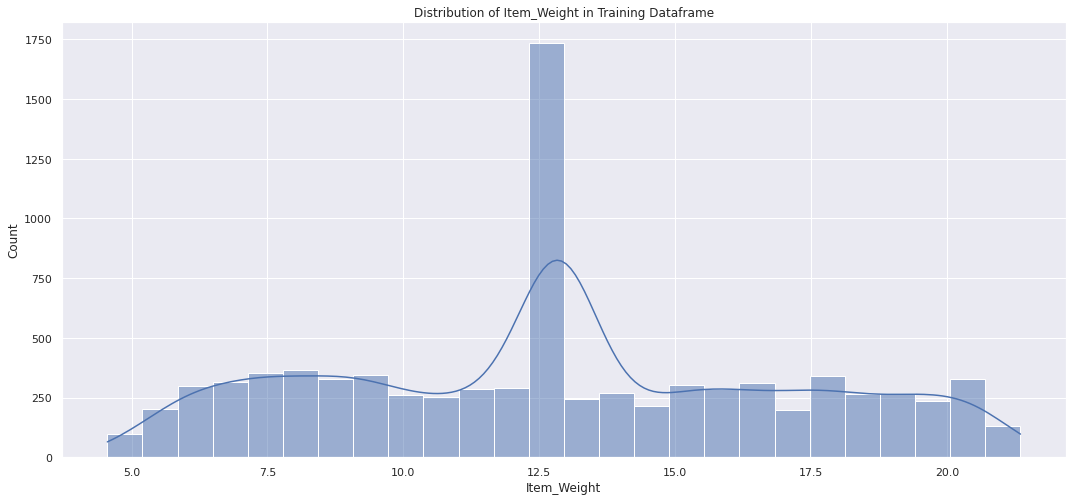

In [28]:
plt.figure(figsize=(18,8))
sns.histplot(df_train['Item_Weight'],kde = True)
plt.title('Distribution of Item_Weight in Training Dataframe')
plt.show()

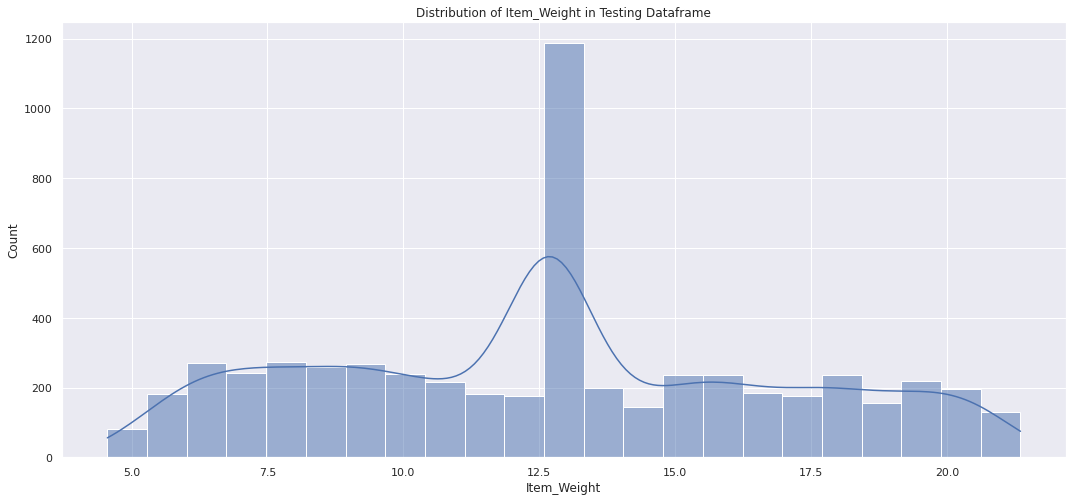

In [29]:
plt.figure(figsize=(18,8))
sns.histplot(df_test['Item_Weight'],kde=True)
plt.title('Distribution of Item_Weight in Testing Dataframe')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Item_Visibility in Training Dataframe')

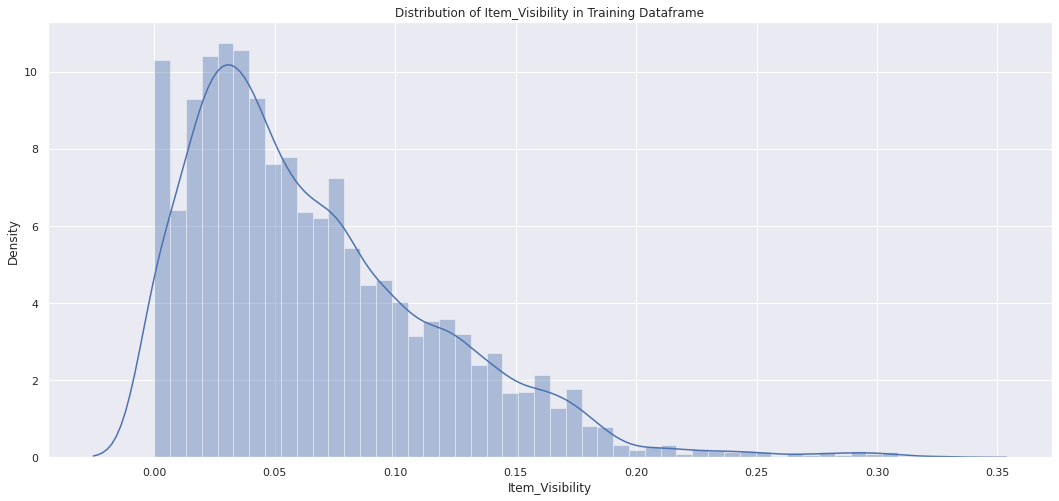

In [30]:
plt.figure(figsize=(18,8))
sns.distplot(df_train['Item_Visibility'])
plt.title('Distribution of Item_Visibility in Training Dataframe')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


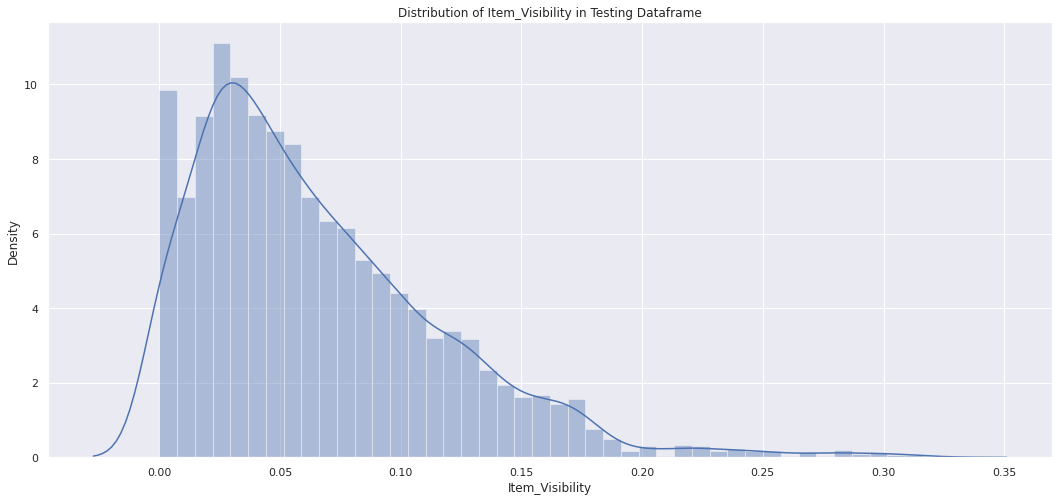

In [31]:
plt.figure(figsize=(18,8))
sns.distplot(df_test['Item_Visibility'])
plt.title('Distribution of Item_Visibility in Testing Dataframe')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Item_MRP in Training Dataframe')

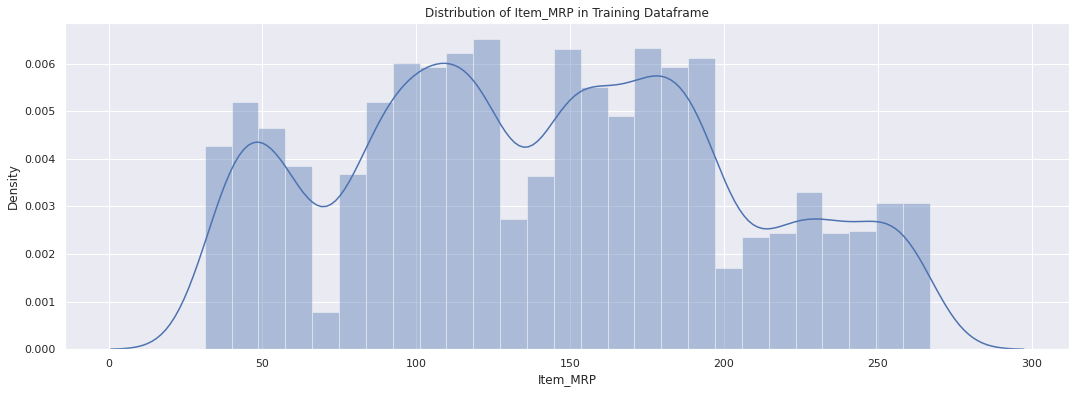

In [32]:
plt.figure(figsize=(18,6))
sns.distplot(df_train['Item_MRP'])
plt.title('Distribution of Item_MRP in Training Dataframe')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


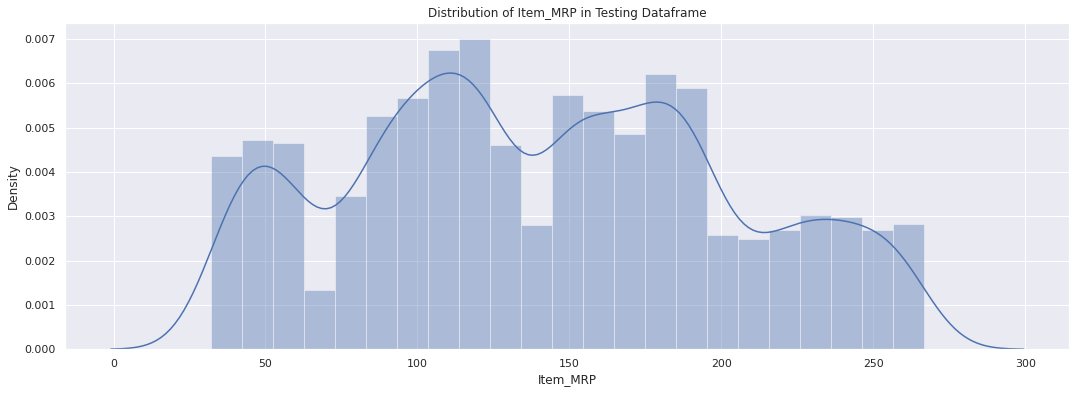

In [33]:
plt.figure(figsize=(18,6))
sns.distplot(df_test['Item_MRP'])
plt.title('Distribution of Item_MRP in Testing Dataframe')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Item_Outlet_Sales in Training Dataframe')

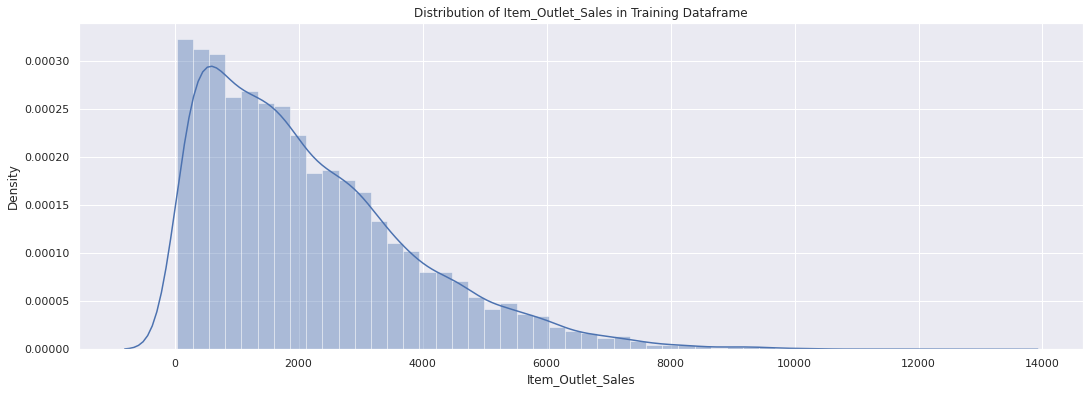

In [34]:
plt.figure(figsize=(18,6))
sns.distplot(df_train['Item_Outlet_Sales'])
plt.title('Distribution of Item_Outlet_Sales in Training Dataframe')


**CountPlots of different variables**

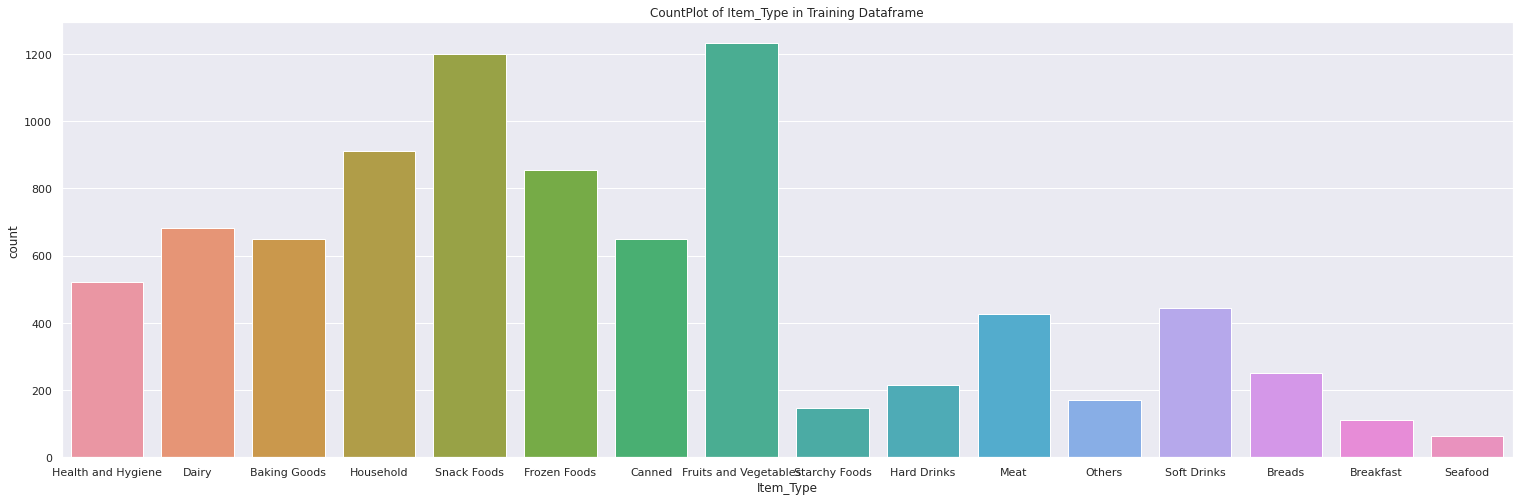

In [35]:
plt.figure(figsize=(26,8))
sns.countplot(x='Item_Type', data=df_train)
plt.title('CountPlot of Item_Type in Training Dataframe')
plt.show()

Maximum number of products sold are snacks, fruits and vegetables.

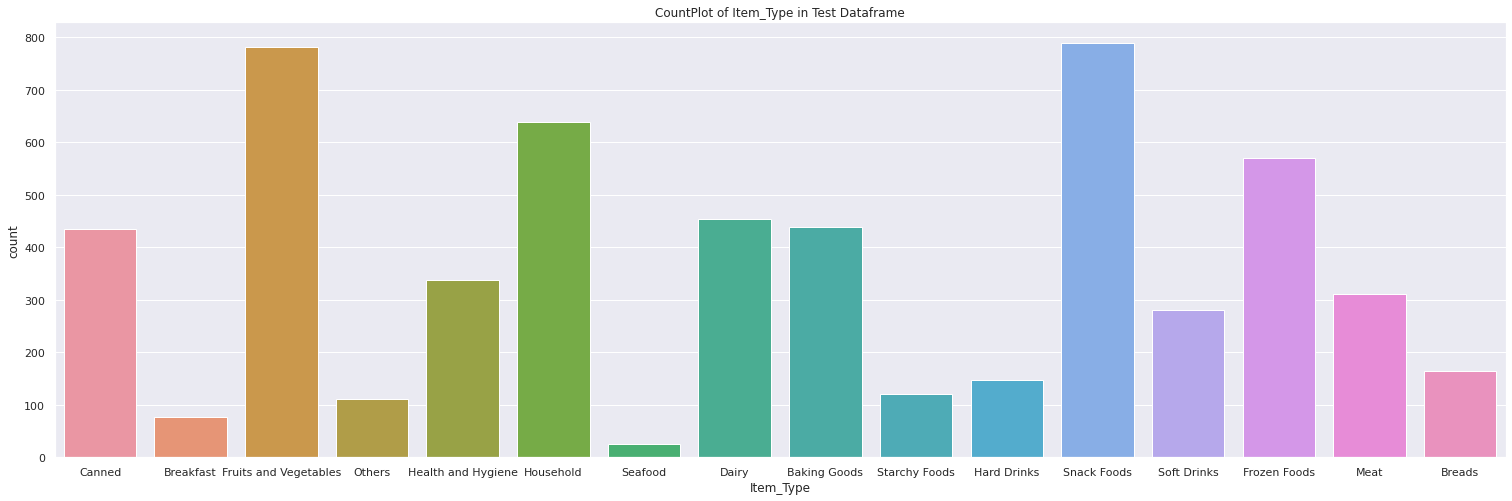

In [36]:
plt.figure(figsize=(26,8))
sns.countplot(x='Item_Type', data=df_test)
plt.title('CountPlot of Item_Type in Test Dataframe')
plt.show()

Trend repeats in the test data as well

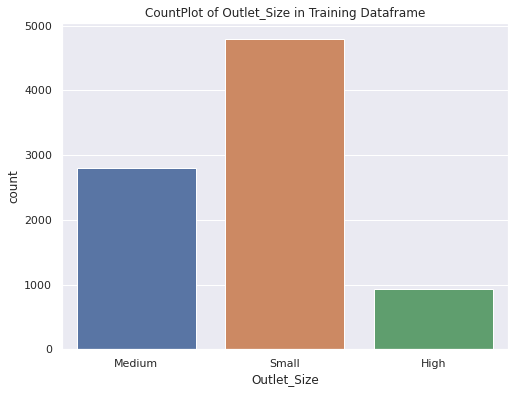

In [37]:
plt.figure(figsize=(8,6))
sns.countplot(x='Outlet_Size', data=df_train)
plt.title('CountPlot of Outlet_Size in Training Dataframe')
plt.show()

We see a high number of small outlets

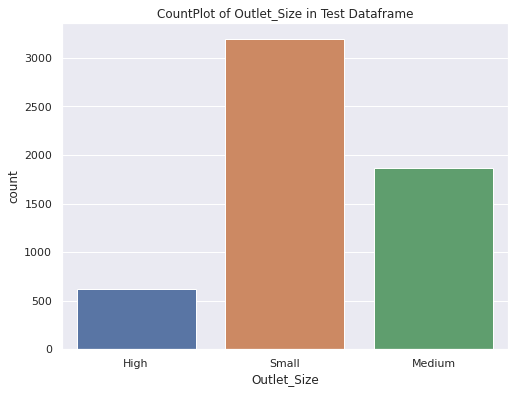

In [38]:
plt.figure(figsize=(8,6))
sns.countplot(x='Outlet_Size', data=df_test)
plt.title('CountPlot of Outlet_Size in Test Dataframe')
plt.show()

Trend of large number of small outlet repeats in the test set

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


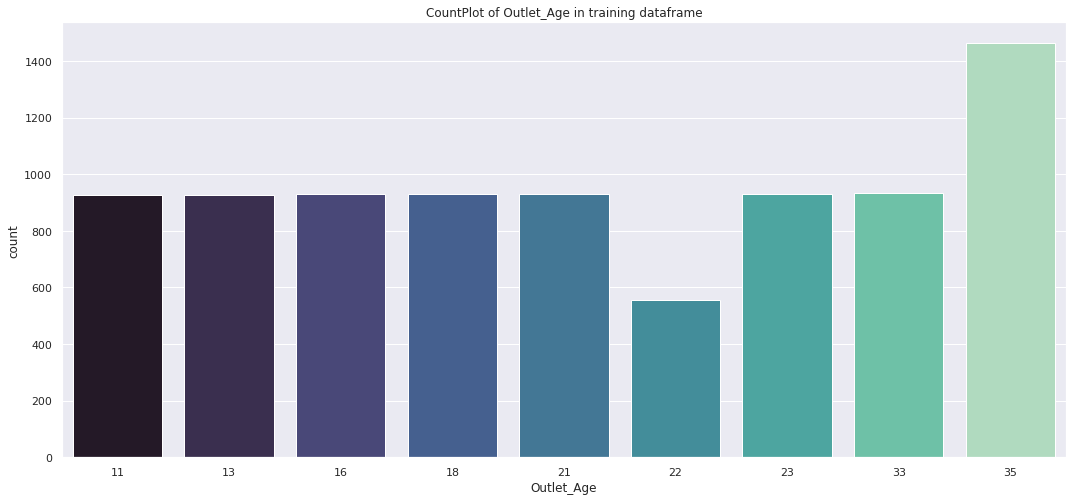

In [39]:
plt.figure(figsize=(18,8))
sns.countplot('Outlet_Age',data=df_train,palette='mako')
plt.title("CountPlot of Outlet_Age in training dataframe")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


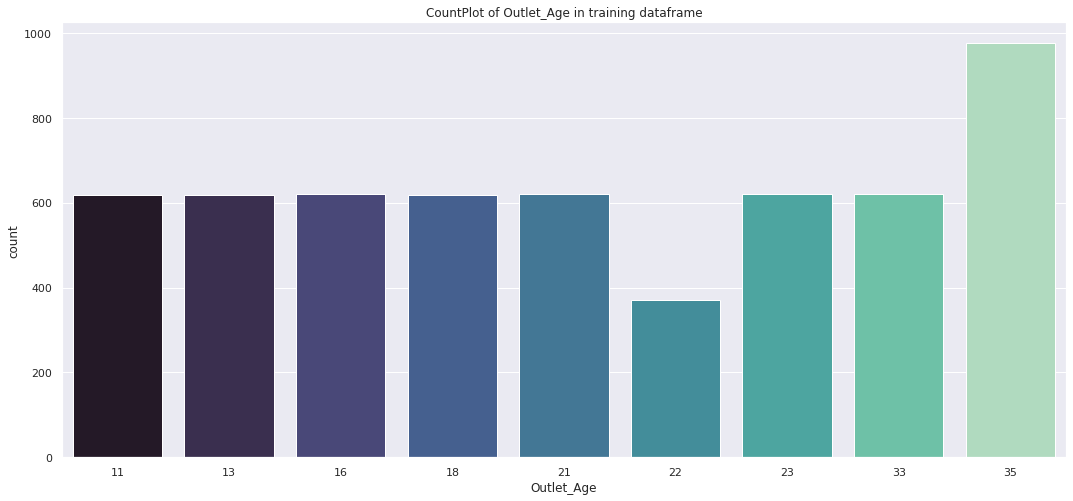

In [40]:
plt.figure(figsize=(18,8))
sns.countplot('Outlet_Age',data=df_test,palette='mako')
plt.title("CountPlot of Outlet_Age in training dataframe")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


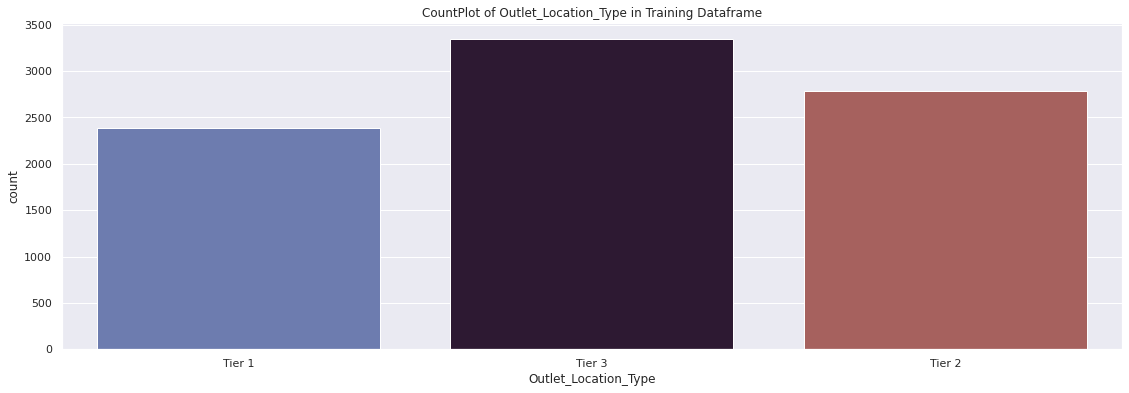

In [41]:
plt.figure(figsize=(19,6))
sns.countplot('Outlet_Location_Type',data=df_train,palette='twilight')
plt.title("CountPlot of Outlet_Location_Type in Training Dataframe")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


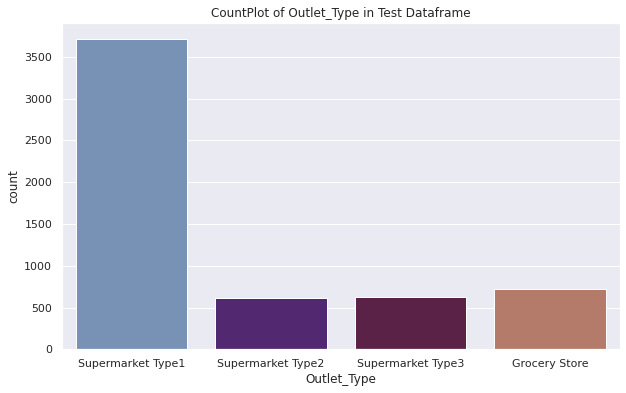

In [42]:
plt.figure(figsize=(10,6))
sns.countplot('Outlet_Type',data=df_test,palette='twilight')
plt.title("CountPlot of Outlet_Type in Test Dataframe")
plt.show()

The Outlets are more of Supermarket Type1.

Label Encoding our data

In [45]:
le = LabelEncoder()
variables = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type']

for i in variables:
    df_train[i] = le.fit_transform(df_train[i])
    
for i in variables:
    df_test[i] = le.fit_transform(df_test[i])

Dropping unnecessary columns

In [46]:
df_train = df_train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [47]:
df_test= df_test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

## Assigning X and Y

**X Variable** - All columns except Outlet Sales

**Y Variable** - Outlet Sales

In [48]:
X = df_train[['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_Age']]
Y = df_train['Item_Outlet_Sales']

**Creating an 80:20 Split**

In [49]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=22)

# Regression Model Building

We approach the problem by building ML Models from simple to complex models on training set and then assess them on the basis of their scores on test dataset.

## Linear Regression

In [51]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
Y_pred_lr = lr.predict(X_test)

In [52]:
r2_lr = sklearn.metrics.r2_score(Y_test,Y_pred_lr)
print("The R2 Score is : ", r2_lr)
mae_lr = sklearn.metrics.mean_absolute_error(Y_test,Y_pred_lr)
print("The MAE is : ", mae_lr)
mse_lr = sklearn.metrics.mean_squared_error(Y_test,Y_pred_lr)
print("The MSE is : ",mse_lr)
rmse_lr = sqrt(sklearn.metrics.mean_squared_error(Y_test,Y_pred_lr))
print("The RMSE is : ", rmse_lr)

The R2 Score is :  0.5026501739678773
The MAE is :  884.6502054996387
The MSE is :  1386423.8303892545
The RMSE is :  1177.4650017683134


## SVR

In [53]:
svr = SVR(kernel = 'linear')
svr.fit(X_train,Y_train)
Y_pred_svr = svr.predict(X_test)

In [54]:
r2_svr = sklearn.metrics.r2_score(Y_test,Y_pred_svr)
print("The R2 Score is : ", r2_svr)
mae_svr = sklearn.metrics.mean_absolute_error(Y_test,Y_pred_svr)
print("The MAE is : ", mae_svr)
mse_svr = sklearn.metrics.mean_squared_error(Y_test,Y_pred_svr)
print("The MSE is : ",mse_svr)
rmse_svr = sqrt(sklearn.metrics.mean_squared_error(Y_test,Y_pred_svr))
print("The RMSE is : ", rmse_svr)

The R2 Score is :  0.47169523139640523
The MAE is :  894.1383783411503
The MSE is :  1472714.5412794352
The RMSE is :  1213.5545069255995


## Decision Tree Regressor

In [55]:
dc = DecisionTreeRegressor()
dc.fit(X_train,Y_train)
Y_pred_dc = dc.predict(X_test)

In [56]:
r2_dc = sklearn.metrics.r2_score(Y_test,Y_pred_dc)
print("The R2 Score is : ", r2_dc)
mae_dc = sklearn.metrics.mean_absolute_error(Y_test,Y_pred_dc)
print("The MAE is : ", mae_dc)
mse_dc = sklearn.metrics.mean_squared_error(Y_test,Y_pred_dc)
print("The MSE is : ",mse_dc)
rmse_dc = sqrt(sklearn.metrics.mean_squared_error(Y_test,Y_pred_dc))
print("The RMSE is : ", rmse_dc)

The R2 Score is :  0.1837885325586449
The MAE is :  1040.713346744868
The MSE is :  2275289.8862471683
The RMSE is :  1508.406406194023


## Random Forest Regressor

In [57]:
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [58]:
r2_rf = sklearn.metrics.r2_score(Y_test,Y_pred_rf)
print("The R2 Score is : ", r2_rf)
mae_rf = sklearn.metrics.mean_absolute_error(Y_test,Y_pred_rf)
print("The MAE is : ", mae_rf)
mse_rf = sklearn.metrics.mean_squared_error(Y_test,Y_pred_rf)
print("The MSE is : ",mse_rf)
rmse_rf = sqrt(sklearn.metrics.mean_squared_error(Y_test,Y_pred_rf))
print("The RMSE is : ", rmse_rf)

The R2 Score is :  0.5633662116358962
The MAE is :  776.7725098263929
The MSE is :  1217170.4053276032
The RMSE is :  1103.2544608237952


## MLP Regressor

In [59]:
mlp = MLPRegressor()
mlp.fit(X_train,Y_train)
Y_pred_mlp = mlp.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [60]:
r2_mlp = sklearn.metrics.r2_score(Y_test,Y_pred_mlp)
print("The R2 Score is : ", r2_mlp)
mae_mlp = sklearn.metrics.mean_absolute_error(Y_test,Y_pred_mlp)
print("The MAE is : ", mae_mlp)
mse_mlp = sklearn.metrics.mean_squared_error(Y_test,Y_pred_mlp)
print("The MSE is : ",mse_mlp)
rmse_mlp = sqrt(sklearn.metrics.mean_squared_error(Y_test,Y_pred_mlp))
print("The RMSE is : ", rmse_mlp)

The R2 Score is :  0.5176905336280682
The MAE is :  867.4498381039041
The MSE is :  1344496.977379423
The RMSE is :  1159.5244617425815


Creating lists for our Model Plot segment.

In [61]:
r2_scores = [r2_lr,r2_svr,r2_dc,r2_rf,r2_mlp]
mae_scores = [mae_lr,mae_svr,mae_dc,mae_rf,mae_mlp]
mse_scores = [mse_lr,mse_svr,mse_dc,mse_rf,mse_mlp]
rmse_scores = [rmse_lr,rmse_svr,rmse_dc,rmse_rf,rmse_mlp]

In [62]:
score_names = ['LR','SVR','DC','RF','MLP']

# Plotting Model Scores

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


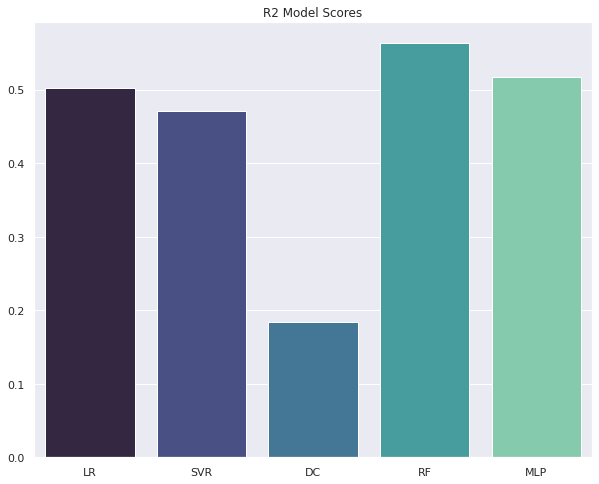

In [63]:
plt.figure(figsize=(10,8))
sns.barplot(score_names,r2_scores, palette = 'mako')
plt.title("R2 Model Scores")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


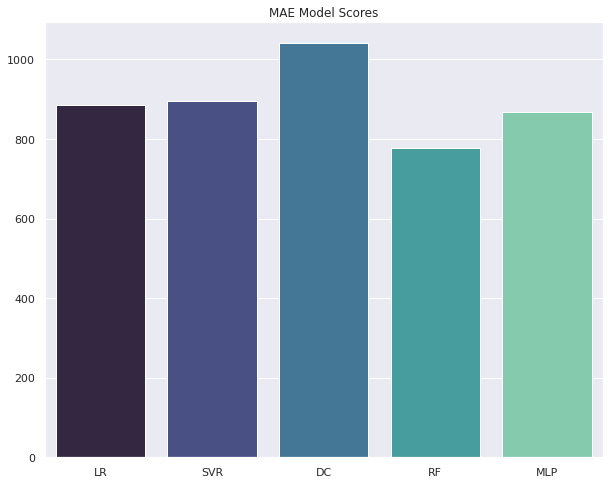

In [64]:
plt.figure(figsize=(10,8))
sns.barplot(score_names,mae_scores, palette = 'mako')
plt.title("MAE Model Scores")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


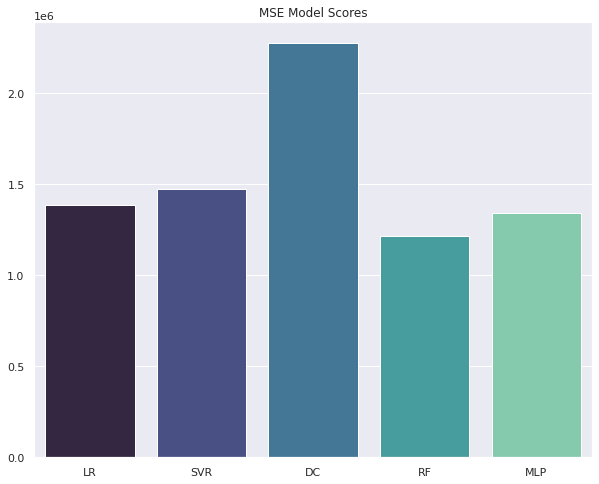

In [65]:
plt.figure(figsize=(10,8))
sns.barplot(score_names,mse_scores, palette = 'mako')
plt.title("MSE Model Scores")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


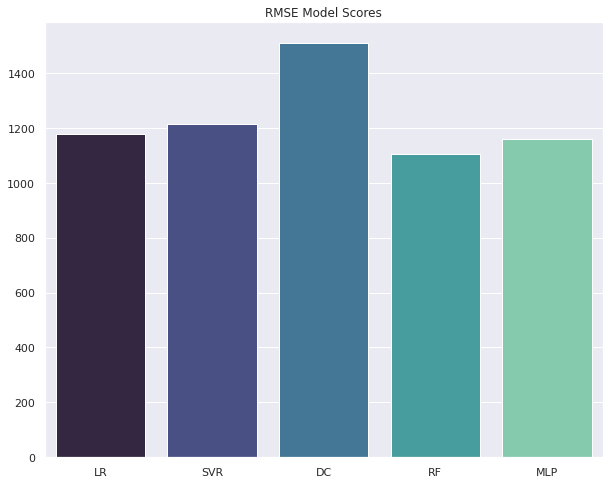

In [66]:
plt.figure(figsize=(10,8))
sns.barplot(score_names,rmse_scores, palette = 'mako')
plt.title("RMSE Model Scores")
plt.show()

# Conclusion

As we can clearly see, the Random Forest Regressor performs best on this dataset.